In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from random import randint
%matplotlib inline

In [2]:
patient=pd.read_csv("patient.csv")

In [3]:
patient.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,...,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,...,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665


In [4]:
sepsis=pd.read_csv("24_hour_sepsis.csv")

In [5]:
sepsis.head()

,patientunitstayid,tsofa,tsus,flag
0,242040,69.0,188.0,1
1,242154,270.0,8589.0,0
2,242290,165.0,165.0,1
3,242434,1340.0,1.0,0
4,242544,9.0,31.0,1


In [10]:
len(sepsis.patientunitstayid.unique())

21635

In [11]:
control=sepsis[sepsis['flag']==0]
control_patients=control['patientunitstayid'].unique()
cases=sepsis[sepsis['flag']==1]
case_patients=cases['patientunitstayid'].unique()

In [12]:
print(len(case_patients))

14175


In [13]:
print("Total suspected patients: ",(len(control_patients)+len(case_patients)))

Total suspected patients:  21635


In [14]:
cases_details=patient[patient['patientunitstayid'].isin(case_patients)]
control_details=patient[patient['patientunitstayid'].isin(control_patients)]
cases_details=cases_details[['patientunitstayid','gender','age','ethnicity','unitdischargestatus']]
control_details=control_details[['patientunitstayid','gender','age','ethnicity','unitdischargestatus']]

<h3><center>Gender Diversity among patients for cases and control</center></h3>

In [15]:
cases_male=cases_details.loc[cases_details['gender']=="Male"]
cases_female=cases_details.loc[cases_details['gender']=="Female"]
control_male=control_details.loc[control_details['gender']=="Male"]
control_female=control_details.loc[control_details['gender']=="Female"]

num_females_case=len(cases_female)
num_males_case=len(cases_male)
num_females_control=len(control_female)
num_males_control=len(control_male)

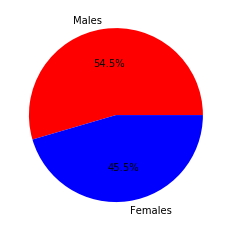

In [16]:
plt.pie([num_males_case,num_females_case],labels=['Males','Females'],colors=['red','blue'],autopct='%1.1f%%')
plt.show()

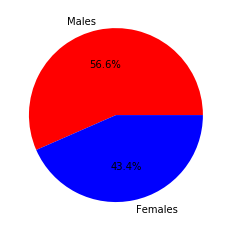

In [17]:
plt.pie([num_males_control,num_females_control],labels=['Males','Females'],colors=['red','blue'],autopct='%1.1f%%')
plt.show()

<h3><center>Demographics Study</center></h3>

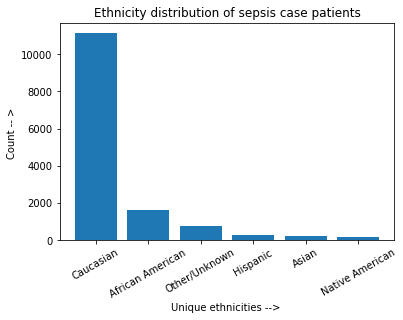

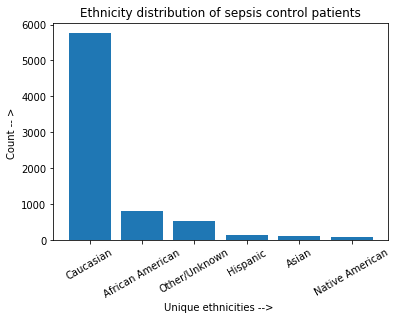

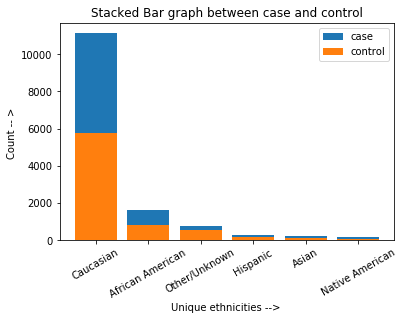

In [18]:
#Demographics study
ethnicity_case=cases_details[['ethnicity']]
ethnicity_control=control_details[['ethnicity']]
ethnicity_case_dict=ethnicity_case['ethnicity'].value_counts().to_dict()
ethnicity_control_dict=ethnicity_control['ethnicity'].value_counts().to_dict()

ethnicity_labels=list(ethnicity_case['ethnicity'].value_counts().to_dict().keys())
ethnicity_case_values=list(ethnicity_case['ethnicity'].value_counts().to_dict().values())
ethnicity_control_values=list(ethnicity_control['ethnicity'].value_counts().to_dict().values())

#Plotting for the cases

plt.bar(ethnicity_labels,ethnicity_case_values)
plt.xlabel("Unique ethnicities --> ")
plt.ylabel("Count -- > ")
plt.title("Ethnicity distribution of sepsis case patients")
plt.xticks(ethnicity_labels,rotation=30)
plt.show()

#Plotting for the controls

plt.bar(ethnicity_labels,ethnicity_control_values)
plt.xlabel("Unique ethnicities --> ")
plt.ylabel("Count -- > ")
plt.title("Ethnicity distribution of sepsis control patients")
plt.xticks(ethnicity_labels,rotation=30)
plt.show()

#for comparison
plt.bar(ethnicity_labels,ethnicity_case_values)
plt.bar(ethnicity_labels,ethnicity_control_values)
plt.xlabel("Unique ethnicities --> ")
plt.ylabel("Count -- > ")
plt.title("Stacked Bar graph between case and control")
plt.xticks(ethnicity_labels,rotation=30)
plt.legend(['case','control'])
plt.show()


<h3><center>Age Distribution</center></h3>

Total number of adults in the suspicious data:  21621
Total number of children in the suspicious data:  14


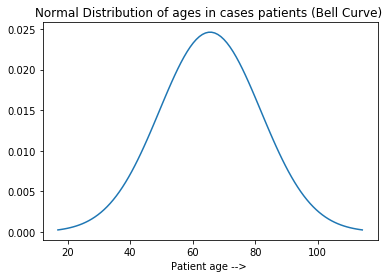

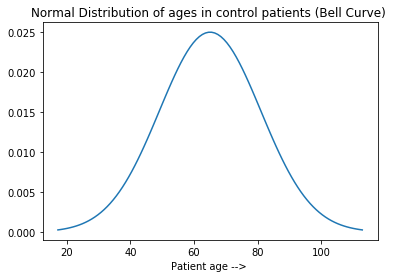

In [20]:
#normal distribution of the ages
case_ages=cases_details['age'].tolist()
control_ages=control_details['age'].tolist()

#there are ages which have been marked >89, which needs to be changed in order to make a graph
#for our convenience, we will replace it with a random number between 90 and 100 to eliminate bias

for n,i in enumerate(case_ages):
    if(i=='> 89'):
        case_ages[n]=str(randint(90,100))

for n,i in enumerate(control_ages):
    if(i=='> 89'):
        control_ages[n]=str(randint(90,100))
        
case_ages=list(map(int,case_ages))
control_ages=list(map(int,control_ages))

case_ages_mean=np.mean(case_ages)
control_ages_mean=np.mean(control_ages)
cases_ages_sigma=np.std(case_ages)
control_ages_sigma=np.std(control_ages)

#-----------------------------------------------
#for counting no. of adults and children in the sample for consort
adult_cases_count=0
children_cases_count=0
adult_control_count=0
children_control_count=0

for i in case_ages:
    if(i>=18):
        adult_cases_count+=1
    else:
        children_cases_count+=1
        
for i in control_ages:
    if(i>=18):
        adult_control_count+=1
    else:
        children_control_count+=1


print("Total number of adults in the suspicious data: ",(adult_cases_count+adult_control_count))
print("Total number of children in the suspicious data: ",(children_cases_count+children_control_count))  

#------------------------------------------------
        
#plotting the bell curves
x_cases = np.linspace(case_ages_mean - 3*cases_ages_sigma, case_ages_mean + 3*cases_ages_sigma, 100)
x_control = np.linspace(control_ages_mean - 3*control_ages_sigma, control_ages_mean + 3*control_ages_sigma, 100)

#for case
plt.plot(x_cases, stats.norm.pdf(x_cases, case_ages_mean, cases_ages_sigma))
plt.xlabel("Patient age --> ")
plt.title("Normal Distribution of ages in cases patients (Bell Curve) ")
plt.show()

#for control
plt.plot(x_control, stats.norm.pdf(x_control, control_ages_mean, control_ages_sigma))
plt.xlabel("Patient age --> ")
plt.title("Normal Distribution of ages in control patients (Bell Curve) ")
plt.show()

From the above graph we can see similar graphs for both the case and control patients. It's simply because people in the range
of 50 to 70 are most susceptible to sepsis. This is what we infer from the graph. 

<h3><center>Consort Diagram</center></h3>
<img src="consort.png">